## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [7]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [8]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [9]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [10]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [11]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [12]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 56us/step - loss: 2.2761 - acc: 0.1494 - val_loss: 2.2261 - val_acc: 0.2017
Epoch 2/500
50000/50000 [==============================] - 3s 52us/step - loss: 2.1927 - acc: 0.2249 - val_loss: 2.1598 - val_acc: 0.2483
Epoch 3/500
50000/50000 [==============================] - 3s 52us/step - loss: 2.1352 - acc: 0.2613 - val_loss: 2.1083 - val_acc: 0.2686
Epoch 4/500
50000/50000 [==============================] - 3s 51us/step - loss: 2.0886 - acc: 0.2808 - val_loss: 2.0660 - val_acc: 0.2918
Epoch 5/500
50000/50000 [==============================] - 3s 51us/step - loss: 2.0496 - acc: 0.2960 - val_loss: 2.0304 - val_acc: 0.3047
Epoch 6/500
50000/50000 [==============================] - 3s 51us/step - loss: 2.0166 - acc: 0.3078 - val_loss: 2.0013 - val_acc: 0.3157
Epoch 7/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.9885 - acc: 0.3172 - val_loss: 1.9746 - 

50000/50000 [==============================] - 2s 50us/step - loss: 1.6534 - acc: 0.4278 - val_loss: 1.6675 - val_acc: 0.4175
Epoch 60/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.6504 - acc: 0.4296 - val_loss: 1.6561 - val_acc: 0.4222
Epoch 61/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.6474 - acc: 0.4304 - val_loss: 1.6541 - val_acc: 0.4232
Epoch 62/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.6445 - acc: 0.4297 - val_loss: 1.6549 - val_acc: 0.4235
Epoch 63/500
50000/50000 [==============================] - 2s 50us/step - loss: 1.6417 - acc: 0.4310 - val_loss: 1.6502 - val_acc: 0.4255
Epoch 64/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.6388 - acc: 0.4327 - val_loss: 1.6474 - val_acc: 0.4257
Epoch 65/500
50000/50000 [==============================] - 2s 50us/step - loss: 1.6358 - acc: 0.4324 - val_loss: 1.6432 - val_acc: 0.4271
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 3s 52us/step - loss: 1.5132 - acc: 0.4738 - val_loss: 1.5436 - val_acc: 0.4592
Epoch 119/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.5115 - acc: 0.4742 - val_loss: 1.5475 - val_acc: 0.4570
Epoch 120/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.5099 - acc: 0.4746 - val_loss: 1.5431 - val_acc: 0.4564
Epoch 121/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.5080 - acc: 0.4762 - val_loss: 1.5385 - val_acc: 0.4564
Epoch 122/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.5062 - acc: 0.4758 - val_loss: 1.5375 - val_acc: 0.4627
Epoch 123/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.5042 - acc: 0.4769 - val_loss: 1.5425 - val_acc: 0.4594
Epoch 124/500
50000/50000 [==============================] - 2s 50us/step - loss: 1.5024 - acc: 0.4779 - val_loss: 1.5303 - val_acc: 0.4641
Epoch 125/500
50000/

50000/50000 [==============================] - 2s 49us/step - loss: 1.4150 - acc: 0.5073 - val_loss: 1.4727 - val_acc: 0.4796
Epoch 177/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.4134 - acc: 0.5086 - val_loss: 1.4729 - val_acc: 0.4806
Epoch 178/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.4119 - acc: 0.5088 - val_loss: 1.4746 - val_acc: 0.4756
Epoch 179/500
50000/50000 [==============================] - 49s 984us/step - loss: 1.4107 - acc: 0.5095 - val_loss: 1.4649 - val_acc: 0.4805
Epoch 180/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.4088 - acc: 0.5089 - val_loss: 1.4678 - val_acc: 0.4787
Epoch 181/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.4071 - acc: 0.5110 - val_loss: 1.4787 - val_acc: 0.4792
Epoch 182/500
50000/50000 [==============================] - 3s 52us/step - loss: 1.4063 - acc: 0.5113 - val_loss: 1.4626 - val_acc: 0.4852
Epoch 183/500
50000/50000 [=====

50000/50000 [==============================] - 2s 49us/step - loss: 1.3323 - acc: 0.5358 - val_loss: 1.4187 - val_acc: 0.4972
Epoch 235/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.3312 - acc: 0.5359 - val_loss: 1.4152 - val_acc: 0.4966
Epoch 236/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.3302 - acc: 0.5370 - val_loss: 1.4165 - val_acc: 0.4984
Epoch 237/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.3286 - acc: 0.5383 - val_loss: 1.4137 - val_acc: 0.4955
Epoch 238/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.3273 - acc: 0.5377 - val_loss: 1.4340 - val_acc: 0.4930
Epoch 239/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.3261 - acc: 0.5387 - val_loss: 1.4197 - val_acc: 0.5001
Epoch 240/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.3243 - acc: 0.5388 - val_loss: 1.4141 - val_acc: 0.4965
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 3s 50us/step - loss: 1.2617 - acc: 0.5601 - val_loss: 1.3845 - val_acc: 0.5070
Epoch 293/500
50000/50000 [==============================] - 3s 52us/step - loss: 1.2596 - acc: 0.5605 - val_loss: 1.3836 - val_acc: 0.5112
Epoch 294/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.2589 - acc: 0.5608 - val_loss: 1.3813 - val_acc: 0.5106
Epoch 295/500
50000/50000 [==============================] - 3s 52us/step - loss: 1.2573 - acc: 0.5617 - val_loss: 1.3795 - val_acc: 0.5094
Epoch 296/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.2572 - acc: 0.5620 - val_loss: 1.4103 - val_acc: 0.4944
Epoch 297/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.2561 - acc: 0.5627 - val_loss: 1.3786 - val_acc: 0.5151
Epoch 298/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.2543 - acc: 0.5641 - val_loss: 1.3799 - val_acc: 0.5114
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 2s 48us/step - loss: 1.1981 - acc: 0.5829 - val_loss: 1.3543 - val_acc: 0.5204
Epoch 351/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.1951 - acc: 0.5837 - val_loss: 1.3621 - val_acc: 0.5171
Epoch 352/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.1948 - acc: 0.5843 - val_loss: 1.3725 - val_acc: 0.5175
Epoch 353/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.1941 - acc: 0.5846 - val_loss: 1.3555 - val_acc: 0.5207
Epoch 354/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.1933 - acc: 0.5841 - val_loss: 1.3583 - val_acc: 0.5149
Epoch 355/500
50000/50000 [==============================] - 2s 50us/step - loss: 1.1914 - acc: 0.5846 - val_loss: 1.3871 - val_acc: 0.5101
Epoch 356/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.1911 - acc: 0.5853 - val_loss: 1.3603 - val_acc: 0.5179
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 2s 48us/step - loss: 1.1365 - acc: 0.6043 - val_loss: 1.3648 - val_acc: 0.5179
Epoch 409/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.1338 - acc: 0.6050 - val_loss: 1.3455 - val_acc: 0.5230
Epoch 410/500
50000/50000 [==============================] - 3s 50us/step - loss: 1.1338 - acc: 0.6057 - val_loss: 1.3359 - val_acc: 0.5257
Epoch 411/500
50000/50000 [==============================] - 2s 50us/step - loss: 1.1310 - acc: 0.6068 - val_loss: 1.3746 - val_acc: 0.5197
Epoch 412/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.1334 - acc: 0.6061 - val_loss: 1.3713 - val_acc: 0.5137
Epoch 413/500
50000/50000 [==============================] - 3s 50us/step - loss: 1.1321 - acc: 0.6056 - val_loss: 1.3425 - val_acc: 0.5238
Epoch 414/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.1312 - acc: 0.6050 - val_loss: 1.3342 - val_acc: 0.5257
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 2s 49us/step - loss: 1.0783 - acc: 0.6239 - val_loss: 1.4027 - val_acc: 0.5048
Epoch 467/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.0773 - acc: 0.6252 - val_loss: 1.3800 - val_acc: 0.5132
Epoch 468/500
50000/50000 [==============================] - 2s 50us/step - loss: 1.0779 - acc: 0.6256 - val_loss: 1.3331 - val_acc: 0.5274
Epoch 469/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.0734 - acc: 0.6256 - val_loss: 1.4647 - val_acc: 0.5035
Epoch 470/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.0766 - acc: 0.6249 - val_loss: 1.3603 - val_acc: 0.5187
Epoch 471/500
50000/50000 [==============================] - 2s 50us/step - loss: 1.0728 - acc: 0.6271 - val_loss: 1.3546 - val_acc: 0.5204
Epoch 472/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.0751 - acc: 0.6246 - val_loss: 1.3933 - val_acc: 0.5100
Epoch 473/500
50000/50000 [=======

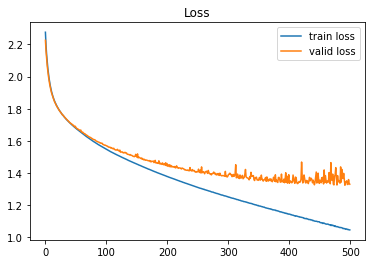

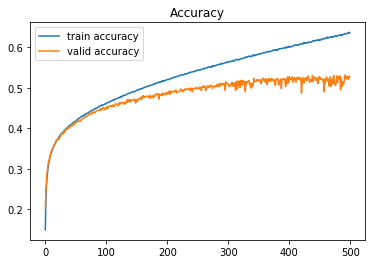

In [14]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()